# EDF data labelling

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import collections
import json
import os
from pathlib import Path
import pyedflib
import re
from subprocess import call
import sys
import typing
import urllib
import torch

In [4]:
print(f'__Python VERSION: {sys.version}')

try:
    print(f'__pyTorch VERSION: {torch.__version__}')
    PYTORCH = True
except: 
    print("Pytorch Not Installed")
    PYTORCH = False

try:
    print(f'__fastai VERSION: {fastai.__version__}')
except:
    print("fastai Not Installed")
    
print('__CUDA VERSION')

! nvcc --version

if PYTORCH:
    print(f'__CUDNN VERSION: {torch.backends.cudnn.version()}')
    print(f'__Number CUDA Devices: {torch.cuda.device_count()}')
    
print(f'__Devices')

try:
    call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
    print(f'Active CUDA Device: GPU {torch.cuda.current_device()}')

    print (f'Available devices: {torch.cuda.device_count()}')
    print (f'Current cuda device {torch.cuda.current_device()}')
except:
    print("No GPUs Found")

__Python VERSION: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
__pyTorch VERSION: 1.13.1+cu116
fastai Not Installed
__CUDA VERSION
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:36:24_Pacific_Standard_Time_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0
__CUDNN VERSION: 8302
__Number CUDA Devices: 2
__Devices
Active CUDA Device: GPU 0
Available devices: 2
Current cuda device 0


In [8]:
here = Path(f'{os.getcwd()}')
# data_path = here.parent/'data'
# raw_path = data_path/'raw'/'v1.5.0/edf'
print(here)

c:\Users\dhc40\gpu_dhc\tuh_eeg\nbs


In [26]:
data_path=r'C:\Users\dhc40\AppData\Roaming\MobaXterm\home\v2.0.0\new_edf'
# print(data_path)
print(data_path)

C:\Users\dhc40\AppData\Roaming\MobaXterm\home\v2.0.0\new_edf


In [27]:
working_files = []
for (dir_path, dir_names, file_names) in os.walk(data_path):
    max_eeg = [re.search('t(\d*)',file.split('/')[-1])[1] for file in file_names]
    m = max(max_eeg) if len(max_eeg) >= 1 else 0
    for file in file_names:
        if file.endswith('.pkl'):
            working_files.append((dir_path + '\\' + file, m))

In [28]:
len(working_files)

691101

In [29]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle

In [30]:
# 랜덤하게 선택할 파일의 개수 설정
num_files_to_visualize = 10
random_files = random.sample([f[0] for f in working_files], num_files_to_visualize)

In [31]:
random_files

['C:\\Users\\dhc40\\AppData\\Roaming\\MobaXterm\\home\\v2.0.0\\new_edf\\aaaaaogm_s001_t000_window_6.pkl',
 'C:\\Users\\dhc40\\AppData\\Roaming\\MobaXterm\\home\\v2.0.0\\new_edf\\aaaaadcy_s001_t000_window_56.pkl',
 'C:\\Users\\dhc40\\AppData\\Roaming\\MobaXterm\\home\\v2.0.0\\new_edf\\aaaaafxd_s003_t000_window_3.pkl',
 'C:\\Users\\dhc40\\AppData\\Roaming\\MobaXterm\\home\\v2.0.0\\new_edf\\aaaaansb_s003_t001_window_130.pkl',
 'C:\\Users\\dhc40\\AppData\\Roaming\\MobaXterm\\home\\v2.0.0\\new_edf\\aaaaamnh_s001_t000_window_11.pkl',
 'C:\\Users\\dhc40\\AppData\\Roaming\\MobaXterm\\home\\v2.0.0\\new_edf\\aaaaacuk_s002_t001_window_11.pkl',
 'C:\\Users\\dhc40\\AppData\\Roaming\\MobaXterm\\home\\v2.0.0\\new_edf\\aaaaantz_s004_t005_window_146.pkl',
 'C:\\Users\\dhc40\\AppData\\Roaming\\MobaXterm\\home\\v2.0.0\\new_edf\\aaaaajvt_s008_t001_window_956.pkl',
 'C:\\Users\\dhc40\\AppData\\Roaming\\MobaXterm\\home\\v2.0.0\\new_edf\\aaaaabya_s004_t002_window_4.pkl',
 'C:\\Users\\dhc40\\AppData\\Roaming\

In [32]:
with open(random_files[0], 'rb') as pkl_file:
    pkl_data = pickle.load(pkl_file)
    print(pkl_data)

{'channel_labels': ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF'], 'data': [array([ 7.02253748,  6.86994971,  7.78547633, ..., -8.38882742,
       -7.01553748, -1.36978994]), array([13.43122387,  8.39582742,  7.48030079, ..., -3.2008432 ,
       -0.30167554,  1.0716144 ]), array([ 8.54841519,  6.10701085,  5.80183531, ..., -5.94742308,
       -4.57413314, -1.21720217]), array([ 5.80183531, 14.65192604,  7.17512525, ..., -6.71036193,
       -0.30167554,  0.61385108]), array([-2.89566765, -4.42154537, -4.26895759, ..., -2.74307988,
       -1.82755325, -1.0646144 ]), array([-0.30167554,  3.66560651, -0.75943886, ..., -5.94742308,
       -2.89566765, -5.33707199]), array([-5.64224754, -5.79483531, -6.55777416, ..., -0.30167554,
       -0.606851

channel 선정

In [34]:
short_ch_names = sorted([
    'A1', 'A2',
    'FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
    'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ'])

# channel name of AR and LE
ar_ch_names = sorted([
    'EEG A1-REF', 'EEG A2-REF',
    'EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF',
    'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF',
    'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF',
    'EEG T6-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF'])
le_ch_names = sorted([
    'EEG A1-LE', 'EEG A2-LE',
    'EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE',
    'EEG C4-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE',
    'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE',
    'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE'])
combined_ch_names = ar_ch_names + le_ch_names
assert len(short_ch_names) == len(ar_ch_names) == len(le_ch_names)
ar_ch_mapping = {ch_name: short_ch_name for ch_name, short_ch_name in zip(
    ar_ch_names, short_ch_names)}
le_ch_mapping = {ch_name: short_ch_name for ch_name, short_ch_name in zip(
    le_ch_names, short_ch_names)}
ch_mapping = {'ar': ar_ch_mapping, 'le': le_ch_mapping}

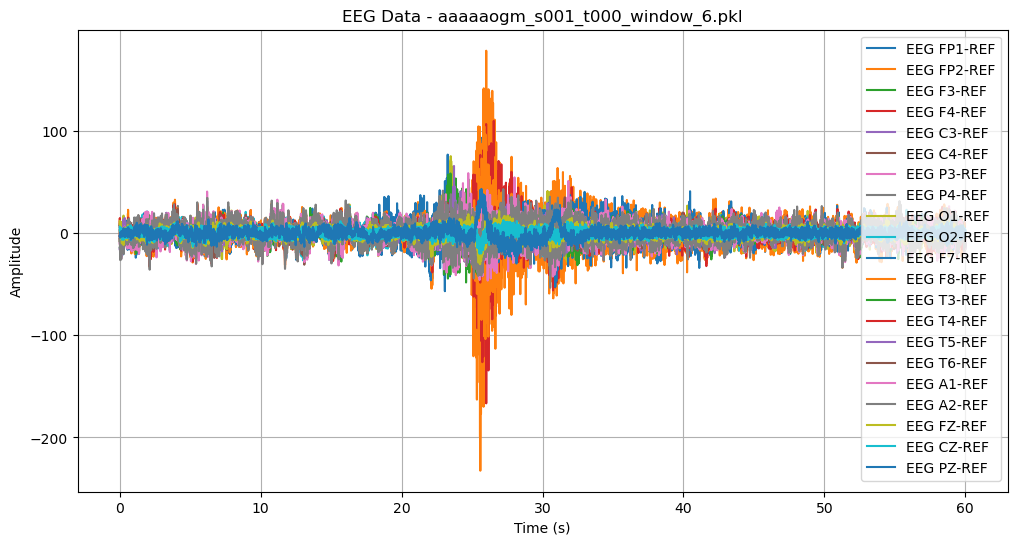

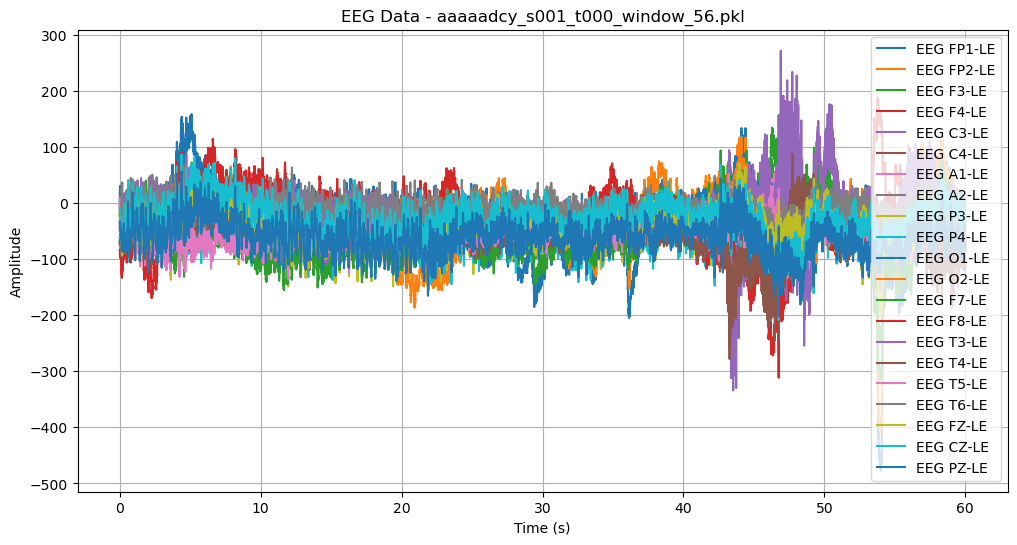

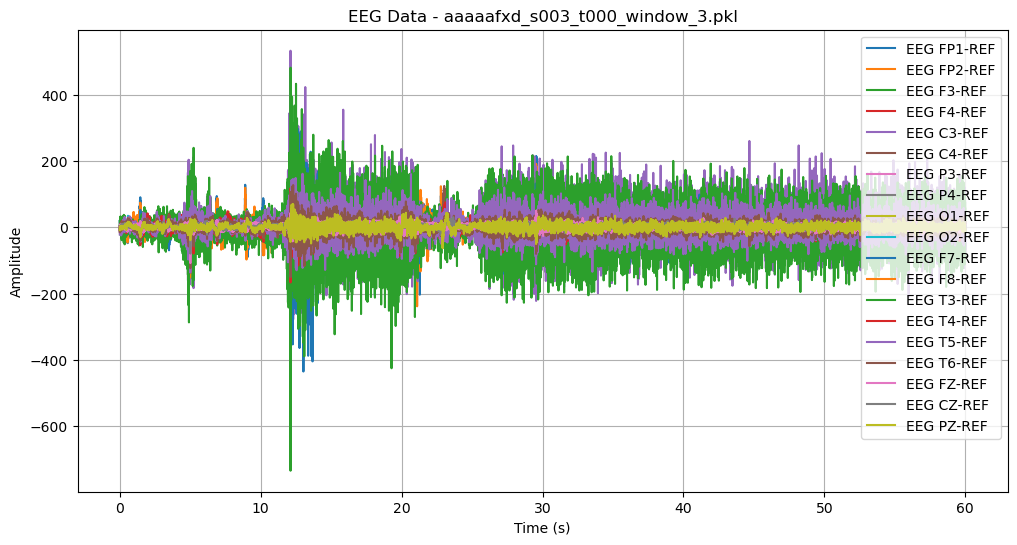

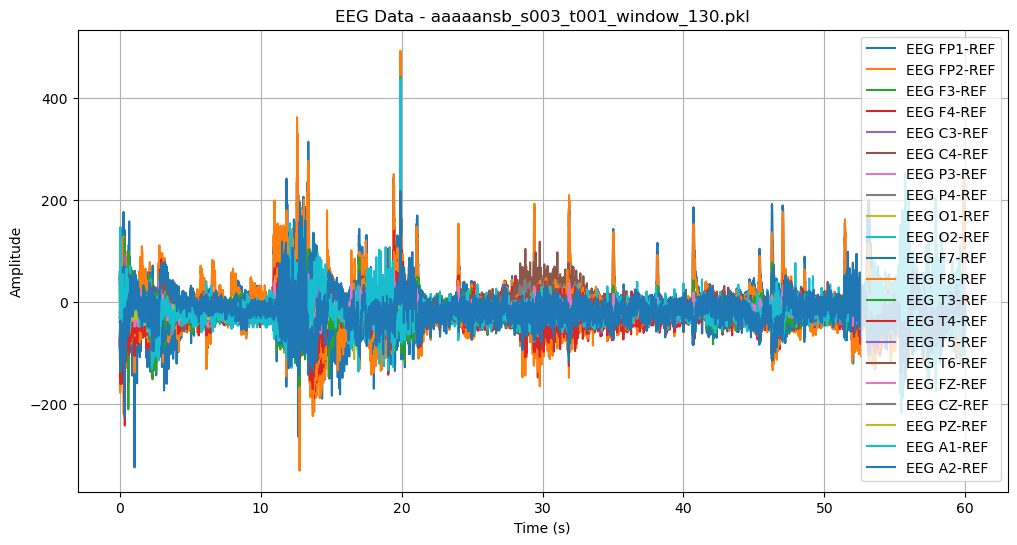

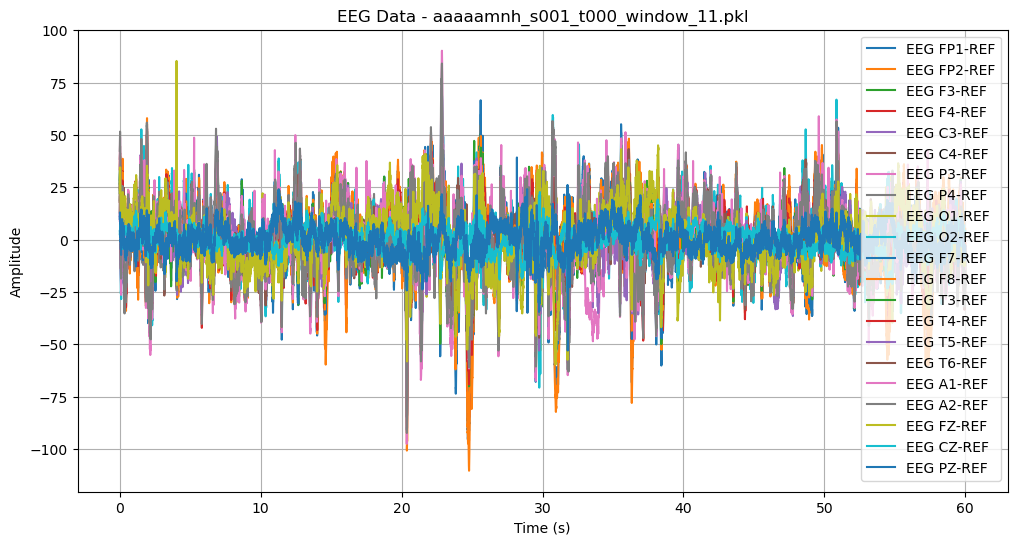

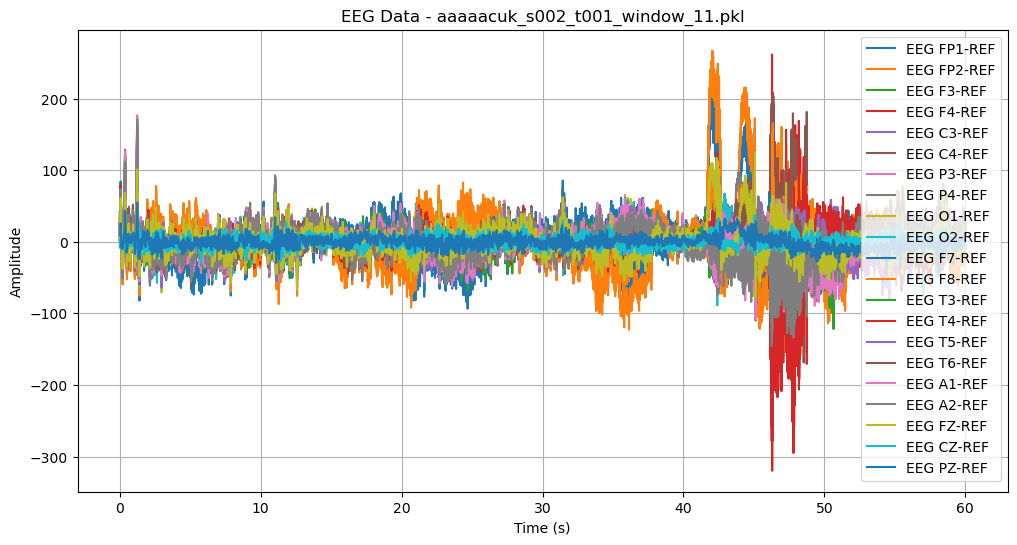

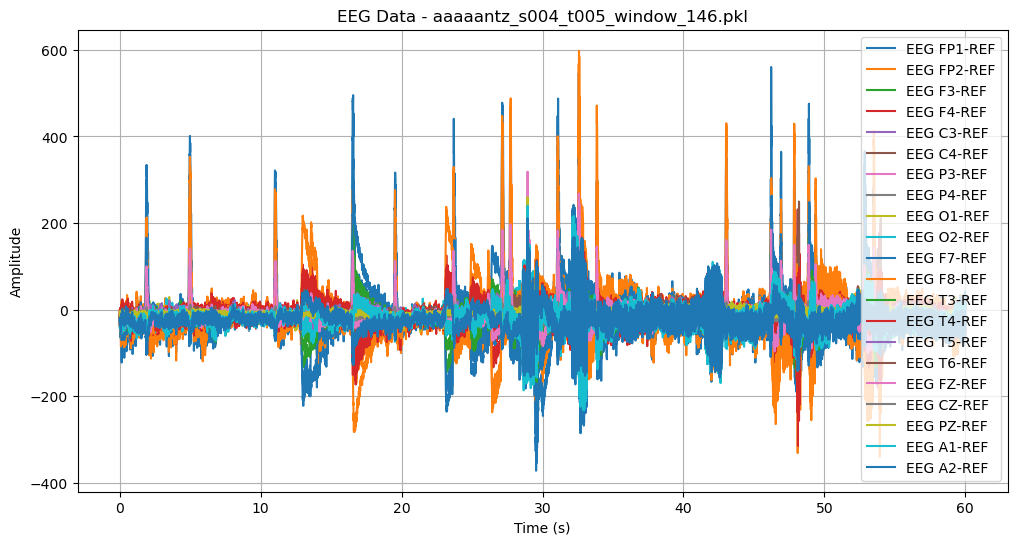

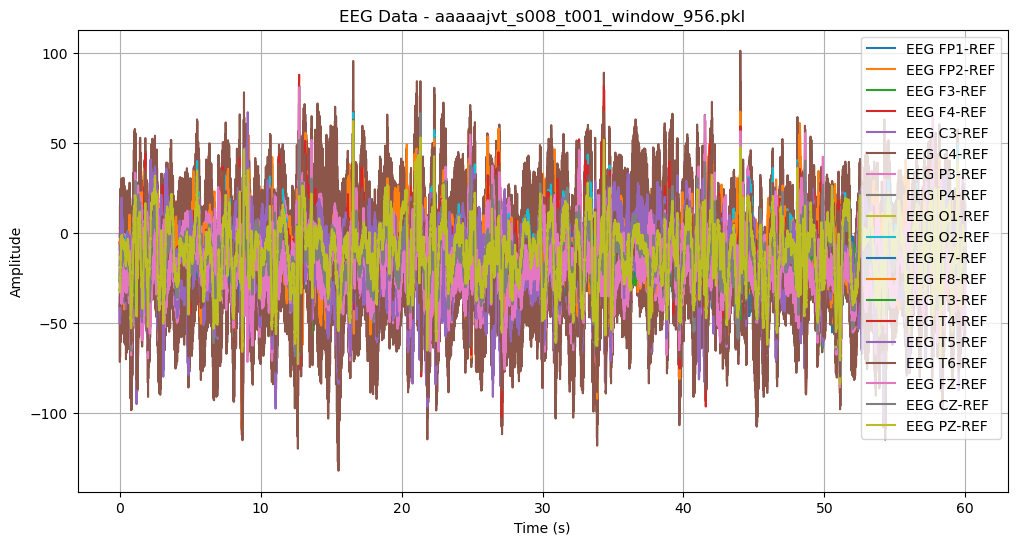

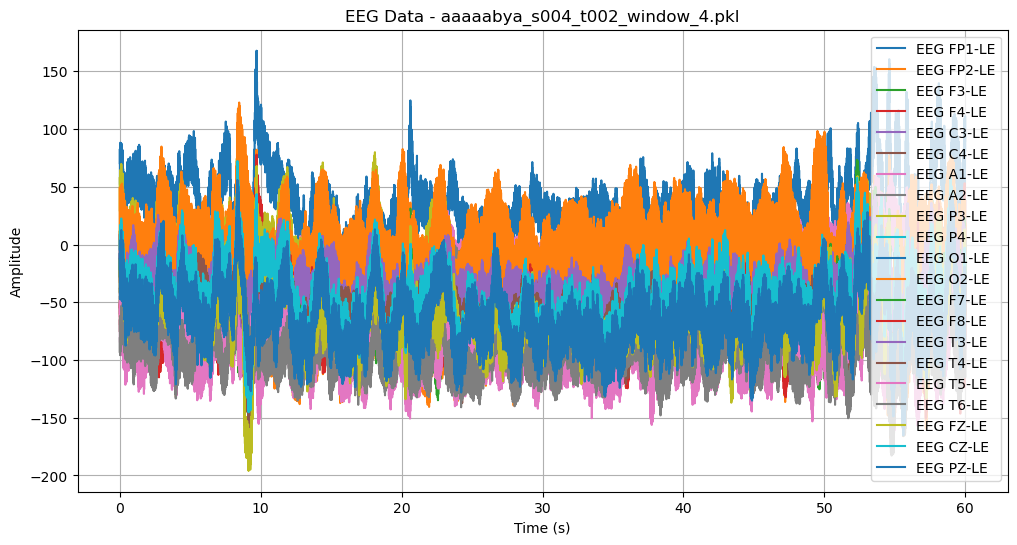

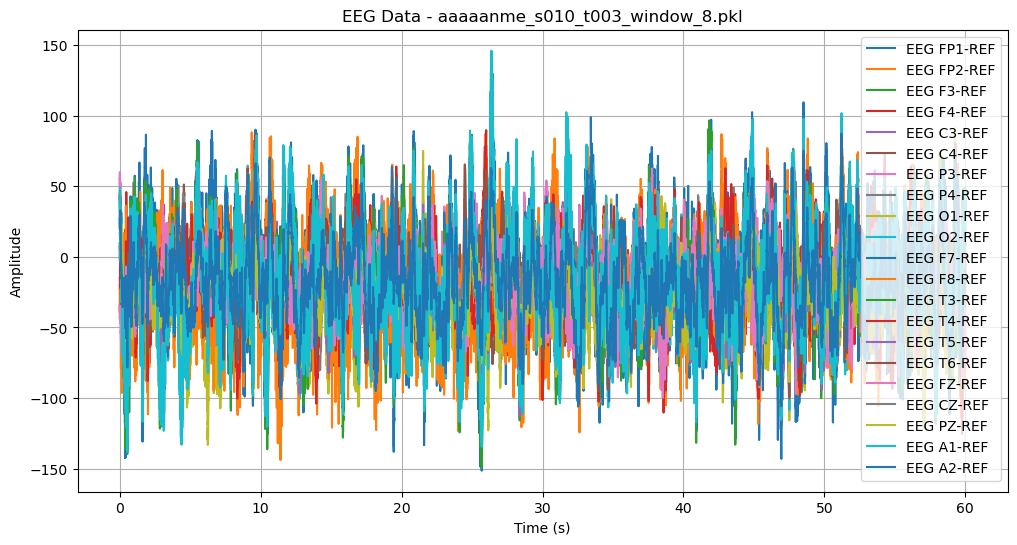

In [35]:

# 각 pkl 파일을 로드하고 그래프를 그림
# 각 pkl 파일을 로드하고 그래프를 그림
for pkl_file_path in random_files:
    with open(pkl_file_path, 'rb') as pkl_file:
        pkl_data = pickle.load(pkl_file)
        channel_labels = pkl_data['channel_labels']
        eeg_data = pkl_data['data']
        sample_frequencies = pkl_data['sample_frequencies']  # 이 부분을 추가하여 pkl 파일에서 sample_frequencies 불러오기

        # Create a time array for the x-axis (assuming the same window size as before)
        time_axis = np.arange(0, 60, 1 / sample_frequencies[0])

        # Visualization
        plt.figure(figsize=(12, 6))
        for channel_data, label in zip(eeg_data, channel_labels):
            plt.plot(time_axis, channel_data, label=label)
        plt.title(f"EEG Data - {os.path.basename(pkl_file_path)}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid(True)
        plt.show()
